In [1]:
import pandas as pd
import numpy as np
import datetime
import urllib, json
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
pipeline = joblib.load('Models/model3_v0.joblib')
encoder =  joblib.load('Models/encoder_v0.joblib')
classifier =  joblib.load('Models/classifier_v0.joblib')

In [57]:
X_test = pd.read_csv('X_test.csv')
X_test.head()

,Turno,Município,Jurisdição,Administração,Conservação,Latitude,Longitude,Condições Climáticas,Iluminação,Mão de direção,...,Tipo de pavimento,Tipo de pista,Traçado,Tipo de Via,Mes_sin,Mes_cos,dias_semana_sin,dias_semana_cos,horario_sin,horario_cos
0,NOITE,SAO BERNARDO DO CAMPO,MUNICIPAL,PREFEITURA,PREFEITURA,-23.7357,-46.57961,BOM,NOITE (VIA ILUMINADA),DUPLA,...,ASFALTO,SIMPLES,RETA,Vias Municipais,1.224647e-16,-1.000000,-2.449294e-16,1.000000,-0.681998,0.731354
1,MANHA,SANTO ANDRE,MUNICIPAL,PREFEITURA,PREFEITURA,-23.6468,-46.53386,BOM,LUZ SOLAR,DUPLA,...,ASFALTO,DUPLA,CRUZAMENTO,Vias Municipais,5.000000e-01,0.866025,-7.818315e-01,0.623490,0.970296,-0.241922
2,MANHA,SAO BERNARDO DO CAMPO,MUNICIPAL,PREFEITURA,PREFEITURA,-23.7073,-46.56215,BOM,LUZ SOLAR,DUPLA,...,ASFALTO,DUPLA,RETA,Vias Municipais,5.000000e-01,0.866025,4.338837e-01,-0.900969,0.258819,-0.965926
3,MANHA,SAO PAULO,MUNICIPAL,PREFEITURA,PREFEITURA,-23.6962,-46.65794,BOM,LUZ SOLAR,DUPLA,...,ASFALTO,DUPLA,RETA,Vias Municipais,5.000000e-01,-0.866025,-7.818315e-01,0.623490,0.675590,-0.737277
4,NOITE,SAO PAULO,MUNICIPAL,PREFEITURA,PREFEITURA,-23.4769,-46.59600,BOM,NOITE (VIA ILUMINADA),DUPLA,...,ASFALTO,DUPLA,CURVA,Vias Municipais,-8.660254e-01,0.500000,9.749279e-01,-0.222521,-0.390731,0.920505


In [58]:
X_test = X_test[['Município','Latitude', 'Longitude', 'Condições Climáticas', 'Mes_sin', 'Mes_cos',
       'dias_semana_sin', 'horario_sin', 'horario_cos']]
X_test.head()

,Município,Latitude,Longitude,Condições Climáticas,Mes_sin,Mes_cos,dias_semana_sin,horario_sin,horario_cos
0,SAO BERNARDO DO CAMPO,-23.7357,-46.57961,BOM,1.224647e-16,-1.000000,-2.449294e-16,-0.681998,0.731354
1,SANTO ANDRE,-23.6468,-46.53386,BOM,5.000000e-01,0.866025,-7.818315e-01,0.970296,-0.241922
2,SAO BERNARDO DO CAMPO,-23.7073,-46.56215,BOM,5.000000e-01,0.866025,4.338837e-01,0.258819,-0.965926
3,SAO PAULO,-23.6962,-46.65794,BOM,5.000000e-01,-0.866025,-7.818315e-01,0.675590,-0.737277
4,SAO PAULO,-23.4769,-46.59600,BOM,-8.660254e-01,0.500000,9.749279e-01,-0.390731,0.920505


In [59]:
X_test['Município'].nunique()

39

In [60]:
X_test['Município'].value_counts()

SAO PAULO                 10743
GUARULHOS                  1086
SAO BERNARDO DO CAMPO       828
SANTO ANDRE                 649
OSASCO                      551
DIADEMA                     378
MOGI DAS CRUZES             333
BARUERI                     314
COTIA                       306
CARAPICUIBA                 247
MAUA                        221
EMBU DAS ARTES              198
TABOAO DA SERRA             182
SUZANO                      159
ITAQUAQUECETUBA             151
ITAPEVI                     107
ITAPECERICA DA SERRA         94
RIBEIRAO PIRES               93
FRANCO DA ROCHA              93
SAO CAETANO DO SUL           87
CAJAMAR                      86
ARUJA                        78
FERRAZ DE VASCONCELOS        72
CAIEIRAS                     60
SANTANA DE PARNAIBA          47
JANDIRA                      43
MAIRIPORA                    41
POA                          41
GUARAREMA                    39
FRANCISCO MORATO             39
EMBU-GUACU                   36
VARGEM G

# testando pipeline

In [61]:
y_pred_probs = pipeline.predict_proba(X_test)
y_pred_probs

array([[0.72205681, 0.27794319],
       [0.69941126, 0.30058874],
       [0.72205681, 0.27794319],
       ...,
       [0.70302947, 0.29697053],
       [0.67758257, 0.32241743],
       [0.70302947, 0.29697053]])

C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


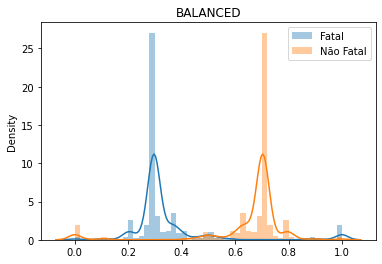

In [62]:
sns.distplot(y_pred_probs[:,1], label='Fatal')
sns.distplot(y_pred_probs[:,0], label='Não Fatal')
plt.legend()
plt.title('BALANCED')
plt.show()

In [ ]:
# parece que NAO funcionou    

# testando artefatos separados

In [64]:
X_test_proc = encoder.transform(X_test)
X_test_proc.head()

,Município,Latitude,Longitude,Condições Climáticas,Mes_sin,Mes_cos,dias_semana_sin,horario_sin,horario_cos
0,0.060106,-23.7357,-46.57961,0.040515,1.224647e-16,-1.000000,-2.449294e-16,-0.681998,0.731354
1,0.059151,-23.6468,-46.53386,0.040515,5.000000e-01,0.866025,-7.818315e-01,0.970296,-0.241922
2,0.060106,-23.7073,-46.56215,0.040515,5.000000e-01,0.866025,4.338837e-01,0.258819,-0.965926
3,0.066648,-23.6962,-46.65794,0.040515,5.000000e-01,-0.866025,-7.818315e-01,0.675590,-0.737277
4,0.066648,-23.4769,-46.59600,0.040515,-8.660254e-01,0.500000,9.749279e-01,-0.390731,0.920505


In [65]:
X_test_proc['Condições Climáticas'].nunique()

4

In [66]:
X_test_proc['Município'].nunique()

38

# predict proba

In [67]:
y_pred_probs2 = classifier.predict_proba(X_test_proc) #retorna um array de probabilidades de ser da classe 0 e classe 1, respectivamente
y_pred_probs2_classe_positiva = classifier.predict_proba(X_test_proc)[:,1]

In [68]:
y_pred_probs2 

array([[0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.97, 0.03],
       [0.98, 0.02],
       [0.95, 0.05]])

In [69]:
y_pred_probs2_classe_positiva.mean()

0.07908914949333941

In [70]:
y_pred_probs2[:,1].mean()

0.07908914949333941

In [71]:
y_pred_probs2[:,0].mean()

0.9209108505066607

C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


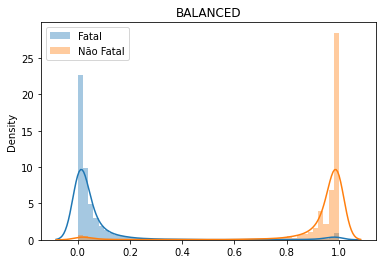

In [72]:
sns.distplot(y_pred_probs2[:,1], label='Fatal')
sns.distplot(y_pred_probs2[:,0], label='Não Fatal')
plt.legend()
plt.title('BALANCED')
plt.show()

Text(0.5, 1.0, 'Histograma "fatais" para X_train')

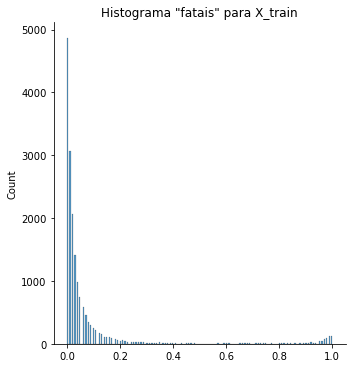

In [73]:
sns.displot(y_pred_probs2[:,1], label='Fatal')
plt.title('Histograma \"fatais\" para X_train')

# testando alguns exemplos dos dados inputados do streamlit

In [82]:
# testando no df real time
current = pd.read_csv('predict095.csv')
current_proc = encoder.transform(current)
current_proc.head()

,Município,Latitude,Longitude,Condições Climáticas,Mes_sin,Mes_cos,dias_semana_sin,horario_sin,horario_cos
0,0.077702,-23.528274,-46.596888,0.859088,0.5,-0.866025,-0.974928,-0.766044,-0.642788


In [83]:
y_pred_probs_current = classifier.predict_proba(current_proc)
y_pred_probs_current #probabilidad de fatal 0,95

array([[0.05, 0.95]])

In [84]:
y_pred_current = classifier.predict(current_proc)
y_pred_current#modelo previuque vai morrer

array([1], dtype=int64)

In [90]:
current2 = pd.read_csv('predict012.csv')
current_proc2 = encoder.transform(current2)
current2.head()

,Município,Latitude,Longitude,Condições Climáticas,Mes_sin,Mes_cos,dias_semana_sin,horario_sin,horario_cos
0,São Bernardo do Campo,-23.686736,-46.562442,BOM,0.5,0.866025,0.433884,0.34202,0.939693


In [86]:
y_pred_probs_current2 = classifier.predict_proba(current_proc2)
y_pred_probs_current2 #probabilidad de fatal 0,12

array([[0.88, 0.12]])

In [87]:
y_pred_current2 = classifier.predict(current_proc2)
y_pred_current2 # modelo previu que não vai morrer

array([0], dtype=int64)

# predict

In [88]:
y_pred2 = classifier.predict(X_test_proc)
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
# qual a diferença? parece que separado o resultado é melhor